# Mall customers clustering analysis

In this notebook in going to follow the data analysis and the clustering made by Roshan Sharma in Kaggle:

https://www.kaggle.com/roshansharma/mall-customers-clustering-analysis

## Install libraries

In [1]:
# for basic mathematics operation
import numpy as np
import pandas as pd
from pandas import plotting

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# for path
import os
print(os.listdir('../data/'))

['Mall_Customers.csv']


Reading the dataset

In [2]:
data = pd.read_csv('../data/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.drop('CustomerID', axis=1).describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## Data Visualization

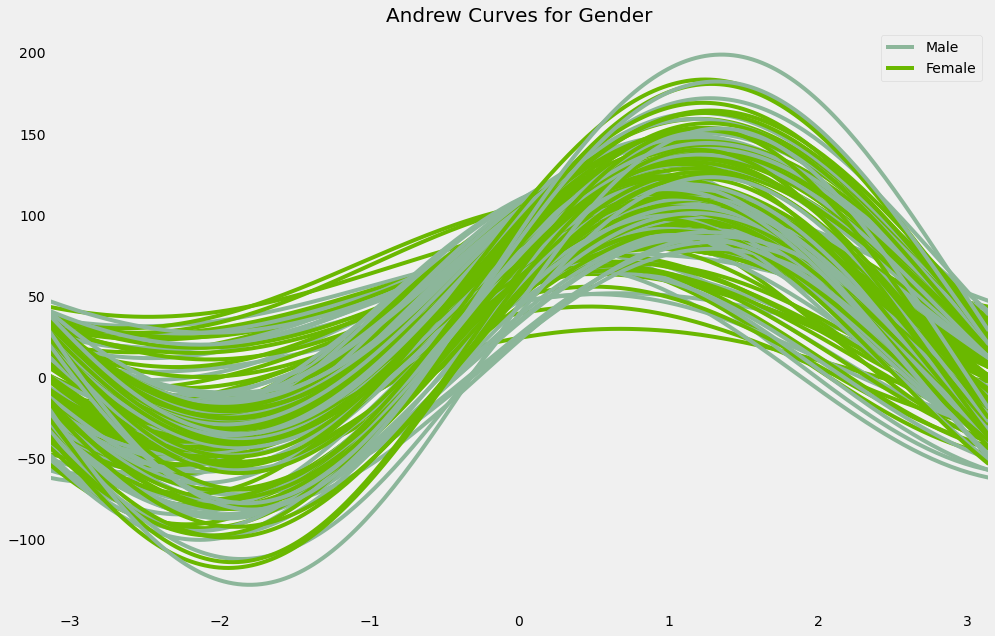

In [4]:
plt.rcParams['figure.figsize'] = (15,10)

plotting.andrews_curves(data[['Gender',
                              'Spending Score (1-100)', 
                              'Annual Income (k$)',
                              'Age']], "Gender")
plt.title('Andrew Curves for Gender', fontsize = 20)
plt.show()

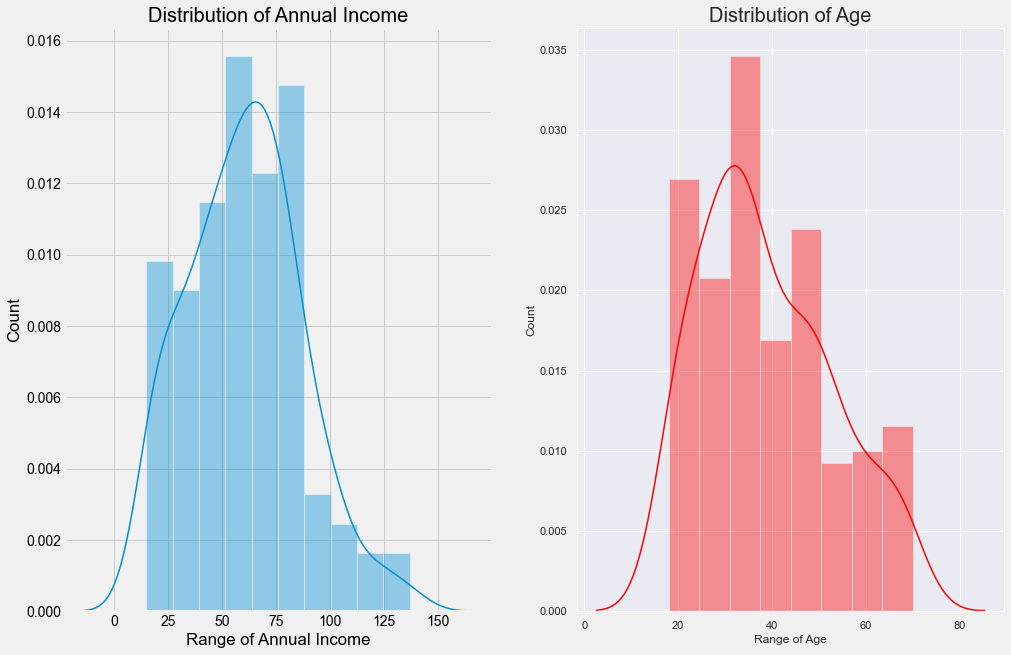

In [5]:
import warnings
warnings.filterwarnings('ignore')

plt.subplot(1,2,1)
sns.set(style='darkgrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.set(style='darkgrid')
sns.distplot(data['Age'], color='red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

plt.show()

([<matplotlib.patches.Wedge at 0x2966a994430>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.2248575863318331, -1.1787446991902115, 'Male')],
 [Text(-0.11242879316591647, 0.5893723495951058, '56.00%'),
  Text(0.13116692536023597, -0.6876010745276234, '44.00%')])

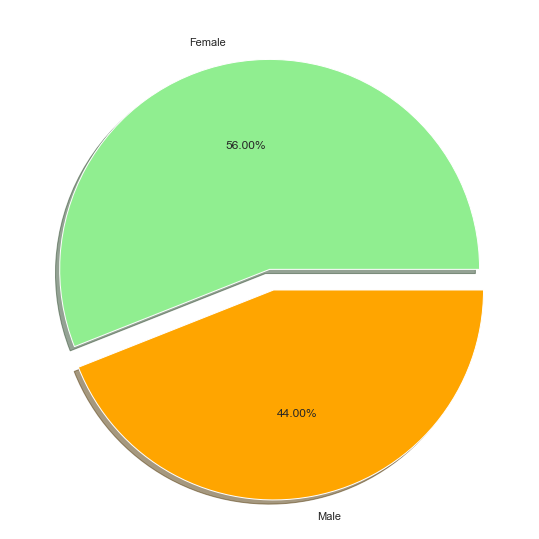

In [6]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0,0.1]

plt.rcParams['figure.figsize'] = [9,9]
plt.pie(size, colors=colors, explode=explode, 
        labels=labels, shadow=True, autopct='%.2f%%')

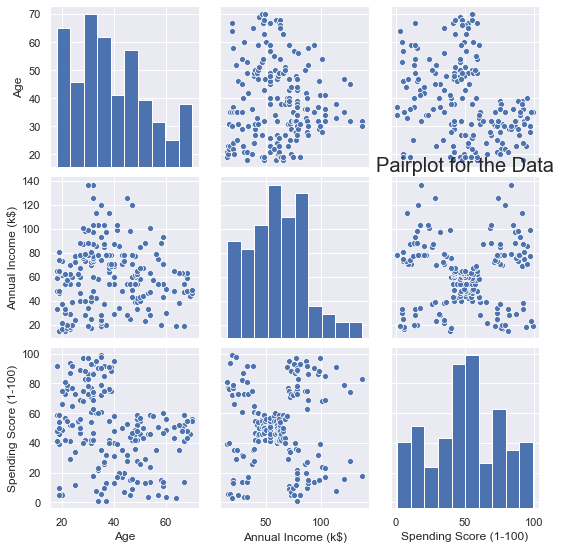

In [7]:
sns.pairplot(data.drop("CustomerID", axis=1))
sns.set(style='darkgrid')
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

In the graphs above we it's hard to see any correlation between variables. It looks like there are five groups (one in the center and 4 in the diagonals) formed with the variables _Annual Income_ and _Spending Score_.

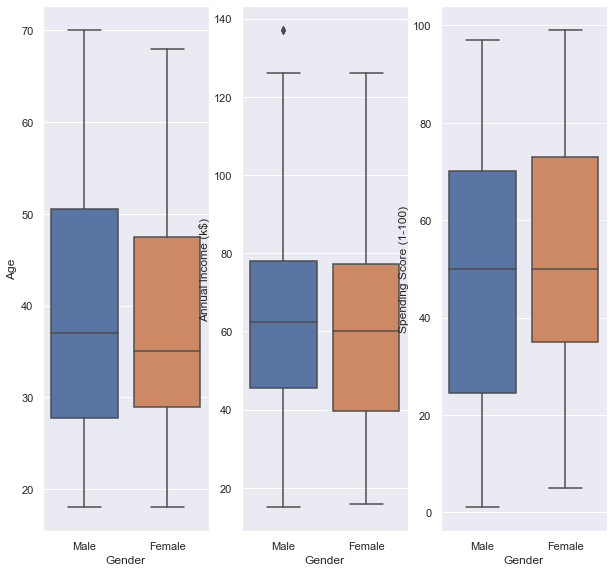

In [8]:
plt.subplot(1,3,1)
sns.set(style='darkgrid')
sns.boxplot(x='Gender', y='Age', data=data)

plt.subplot(1,3,2)
sns.set(style='darkgrid')
sns.boxplot(x='Gender', y='Annual Income (k$)', data=data)

plt.subplot(1,3,3)
sns.set(style='darkgrid')
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data)

It doesn't look like there are any huge different between females and males. We can apreciate some outlayers in the Male's Annual Income.

# Clustering Analysis

In [9]:
x = data.iloc[:,[2,3,4]]
print(x)

     Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]


## Kmeans algorithm

Elbow method to find the number of optimal clusters

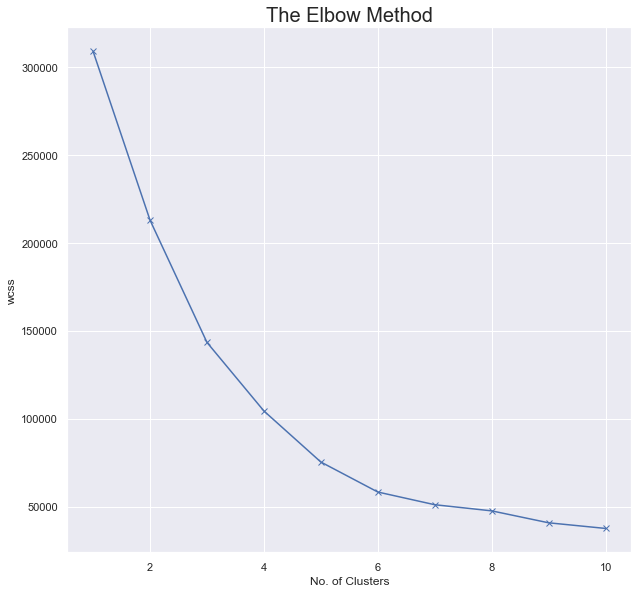

In [10]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init = 10,
                random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11), wcss, 'bx-')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, it seems that the optimal value of k is 5.

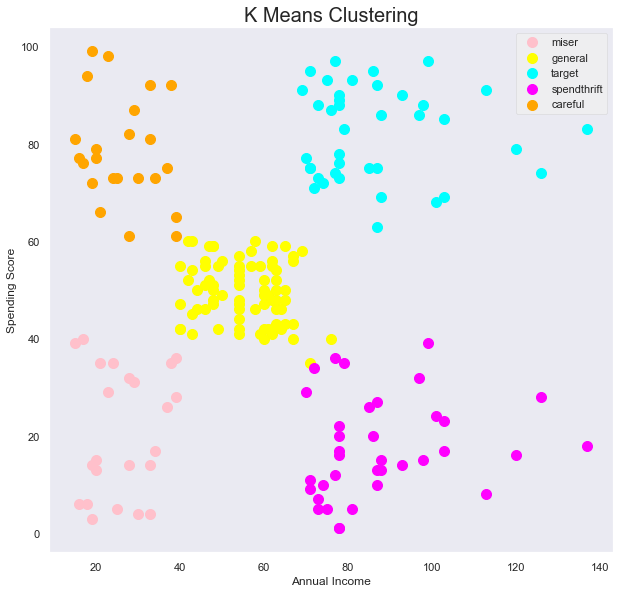

In [11]:
km = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init = 10,
                random_state = 0)
y_means = km.fit_predict(x)

colors = ['pink', 'yellow', 'cyan', 'magenta', 'orange']
labels = ['miser', 'general', 'target', 'spendthrift', 'careful', 'centeroid']

for i in range(5):
    plt.scatter(x[y_means == i]['Annual Income (k$)'],
                x[y_means == i]['Spending Score (1-100)'], 
                s=100, c=colors[i], label=labels[i])
    
plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

No handles with labels found to put in legend.


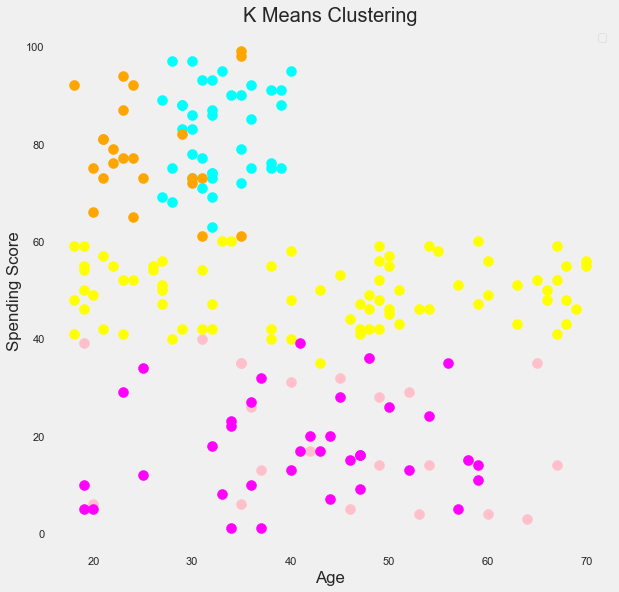

In [12]:
colors = ['pink', 'yellow', 'cyan', 'magenta', 'orange']

for i in range(5):
    plt.scatter(x[y_means == i]['Age'],
                x[y_means == i]['Spending Score (1-100)'], 
                s=100, c=colors[i])
    
plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

No handles with labels found to put in legend.


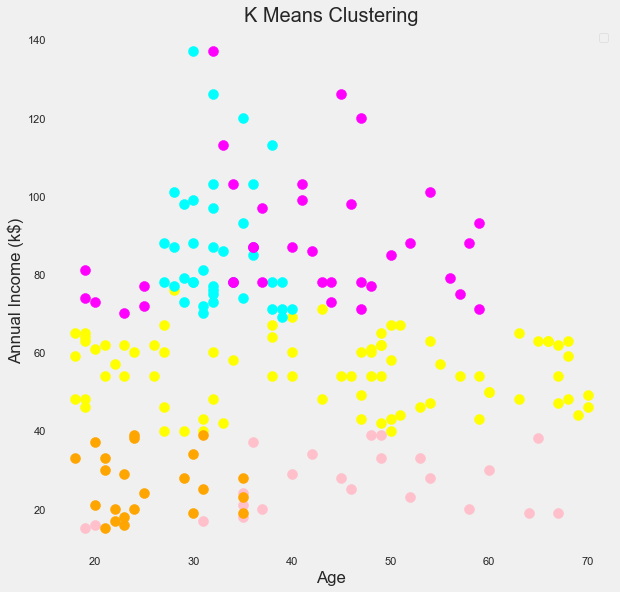

In [13]:
colors = ['pink', 'yellow', 'cyan', 'magenta', 'orange']

for i in range(5):
    plt.scatter(x[y_means == i]['Age'],
                x[y_means == i]['Annual Income (k$)'], 
                s=100, c=colors[i])
    
plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.grid()
plt.show()